# **Demography of Coders in 2020**




In this notebook, I will try to answer how the age and country can affect people to learn about code


1.   What is the age range trend of coders?
2.   What is the most used programming language in an age range?
3.   How is the correlation between 1st age code and years code in a country based on its age range? 



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

We load Pandas, Numpy, and pyplot for this project. This libraries will be heavily used for this project

**Load and Filter Data needed**

For understanding the data, we only use the desired column to answer the question above.
The desired columns are mainly about the background of respondent.

In [40]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Load data from csv
df = pd.read_csv('/content/drive/MyDrive/Dataset Udacity/Stack Overflow 2020/survey_results_public.csv')

# Show only the desired column
column = ['Age1stCode','Country','YearsCode','LanguageWorkedWith']

df = df[column]

df.head()

,Age1stCode,Country,YearsCode,LanguageWorkedWith
0,13,Germany,36,C#;HTML/CSS;JavaScript
1,19,United Kingdom,7,JavaScript;Swift
2,15,Russian Federation,4,Objective-C;Python;Swift
3,18,Albania,7,NaN
4,16,United States,15,HTML/CSS;Ruby;SQL


We won't use the unknown data

In [42]:
df = df.dropna()

In [43]:
df['Age1stCode'] = df['Age1stCode'].apply(pd.to_numeric, errors='coerce')
df['YearsCode'] = df['YearsCode'].apply(pd.to_numeric, errors='coerce')
pd.options.display.float_format = '{:,.0f}'.format

df['Age'] = df.Age1stCode + df.YearsCode
df.head()

,Age1stCode,Country,YearsCode,LanguageWorkedWith,Age
0,13,Germany,36,C#;HTML/CSS;JavaScript,49
1,19,United Kingdom,7,JavaScript;Swift,26
2,15,Russian Federation,4,Objective-C;Python;Swift,19
4,16,United States,15,HTML/CSS;Ruby;SQL,31
5,14,Germany,6,HTML/CSS;Java;JavaScript,20


Working age group is between 15 and 64. From the data above we will classified the data based on its age with the range of 10 for each class.

In [44]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 64)]

class_list = [0,9.9,19.9,29.9,39.9,49.9,59.9,69.9]
class_name = ['00s','10s', '20s', '30s', '40s','50s','60s']

df['AgeTrend'] = pd.cut(df['Age'], class_list , labels = class_name)
df.head()

,Age1stCode,Country,YearsCode,LanguageWorkedWith,Age,AgeTrend
0,13,Germany,36,C#;HTML/CSS;JavaScript,49,40s
1,19,United Kingdom,7,JavaScript;Swift,26,20s
2,15,Russian Federation,4,Objective-C;Python;Swift,19,10s
4,16,United States,15,HTML/CSS;Ruby;SQL,31,30s
5,14,Germany,6,HTML/CSS;Java;JavaScript,20,20s


# **Analysis**

After the data is cleaned, we are trying to answer the question using several analysis

**Age Range Trend for Coders**

To know the age trend of coders, we simply plot the data based on the age range.



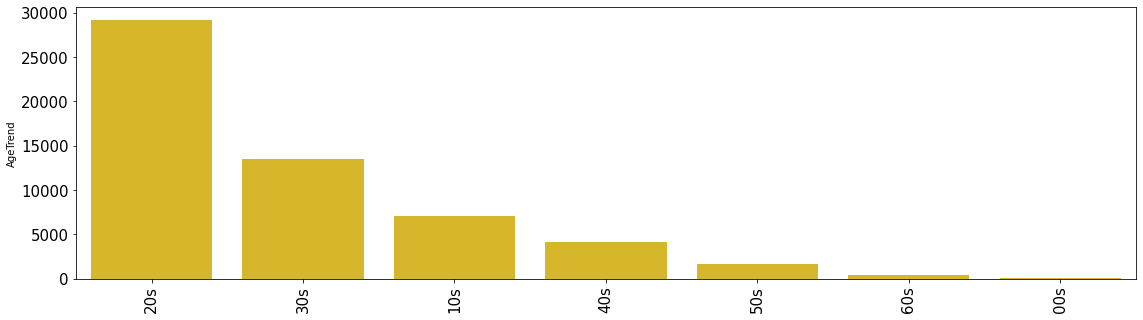

In [ ]:

plt.figure(figsize=(19,5))
plt.xticks(rotation='vertical', fontsize=15.0)
plt.yticks(fontsize=15.0)
sns.barplot(x=df['AgeTrend'].value_counts().index, y=df['AgeTrend'].value_counts(), color="#F2C80F", order=df['AgeTrend'].value_counts().index)
plt.show()

As you can see, the coders are mostly in their 20s. People in 20s are born from 1990s to 2000, when technology thrived at a high pace. Followed by people in 30s then 10s. It shows that people in 10s have a high curiosity in programming language.

**Most used programming Language in an age range**

To know the most used programming Language in an age range, we have to split list in *LanguageWorkedWith* column and total users of each Language in each Age Group.

In [94]:
d_list = []

for index, row in df.iterrows():
    for value in str(row['LanguageWorkedWith']).split(';'):
        d_list.append({'AgeTrend':row['AgeTrend'], 
                       'Language':value})
df_Language = df.append(d_list, ignore_index=True)
df_Language = df_Language.groupby('AgeTrend')['Language'].value_counts()
df_Language = df_Language.unstack(level=-1).fillna(0)
df_Language

Language,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Objective-C,PHP,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
AgeTrend,,,,,,,,,,,,,,,,,,,,,,,,,
10s,525,1757,1648,1704,1861,314,454,3899,168,2563,3812,41,448,134,1451,70,3151,319,362,408,2744,117,329,1191,290
20s,1682,8569,6189,8237,6692,1201,2426,17503,616,11658,18871,237,2335,1022,7408,527,12495,1650,1828,1444,14994,965,1605,7521,1346
30s,491,4799,1932,4399,2273,314,1250,7856,211,4581,8906,79,955,637,3270,507,4949,673,1064,623,7463,588,724,3582,824
40s,262,1717,827,1485,858,107,370,2348,66,1411,2592,40,238,208,946,290,1515,223,314,163,2438,156,242,919,389
50s,137,681,418,551,432,40,104,843,24,503,920,18,66,88,312,165,629,90,89,47,958,43,125,246,201
60s,31,94,78,98,84,5,13,120,8,72,145,5,14,19,53,34,87,16,14,7,160,9,21,34,46


Then, we are going to find the top 5 programming language for each Age group

In [107]:
df_Language_10s = df_Language.iloc[0].sort_values(ascending=False).head(5)
df_Language_20s = df_Language.iloc[1].sort_values(ascending=False).head(5)
df_Language_30s = df_Language.iloc[2].sort_values(ascending=False).head(5)
df_Language_40s = df_Language.iloc[3].sort_values(ascending=False).head(5)
df_Language_50s = df_Language.iloc[4].sort_values(ascending=False).head(5)
df_Language_60s = df_Language.iloc[5].sort_values(ascending=False).head(5)
#plt.xticks(rotation='vertical', fontsize=15.0)
#plt.yticks(fontsize=15.0)
#sns.barplot(x=df_Language['C'], y=df_Language.index.max(axis=1), color="#F2C80F")
#plt.show()

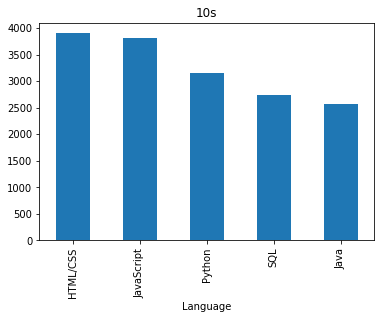

In [111]:
df_Language_10s.plot(kind='bar', title='10s')

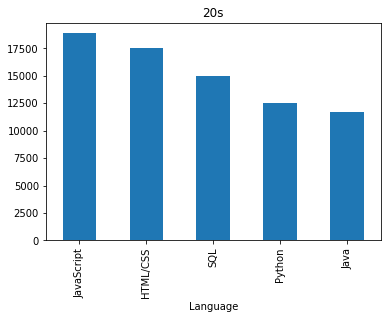

In [112]:
df_Language_20s.plot(kind='bar',title='20s')

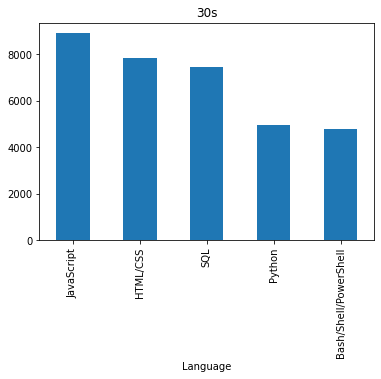

In [113]:
df_Language_30s.plot(kind='bar',title='30s')

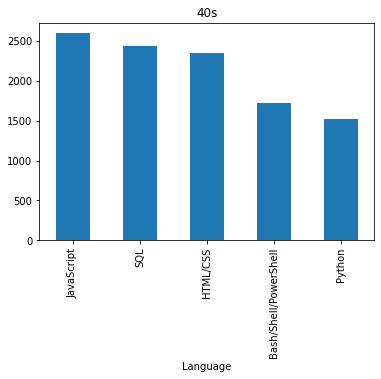

In [114]:
df_Language_40s.plot(kind='bar',title='40s')

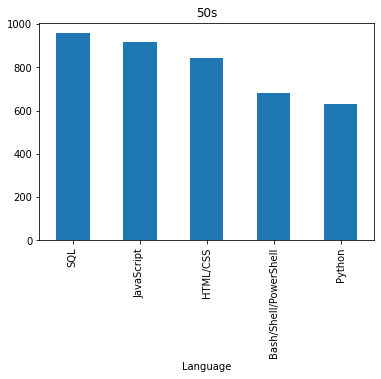

In [115]:
df_Language_50s.plot(kind='bar',title='50s')

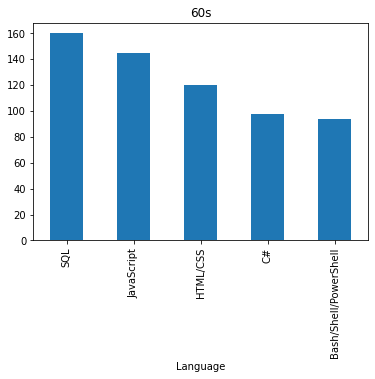

In [116]:
df_Language_60s.plot(kind='bar',title='60s')

Shown in the histogram above, we can see that each age group has different top 5's programming language. But surprisingly, SQL, Javascript and HTML/CSS are repetitively shown in each age group.

**Correlation between Country and the Age Group**